### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 6
### Due: Saturday, Apr 3rd at 11.59pm CST
---

## Problem 1

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

### Solution

### 1. Read in hw6_data_1.npy. The dataset should consist of  1000  samples with  2  features. Note that the last column are the labels, not another feature. Make a  2 -D scatter plot of the data colored by their labels.

In [1]:
#IMPORTS
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from scipy.stats import laplace

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import time



In [2]:
filename = '../../homeworks/hw_data/hw6_data_1.npy' 
samples_feaut = np.load(filename)
fe_1 = samples_feaut[:,0]
fe_2 = samples_feaut[:,1]
labels = samples_feaut[:,2]
#print(labels)
samples_feaut

array([[-8.46474567, -3.45517123,  1.        ],
       [-9.93233853, -2.31955228,  1.        ],
       [-9.30833095, -1.9725388 ,  1.        ],
       ...,
       [-3.42236789,  1.69166315,  2.        ],
       [-3.31992823, -6.1090681 ,  3.        ],
       [-3.62495834,  0.11710104,  2.        ]])

Text(0, 0.5, 'feature 2')

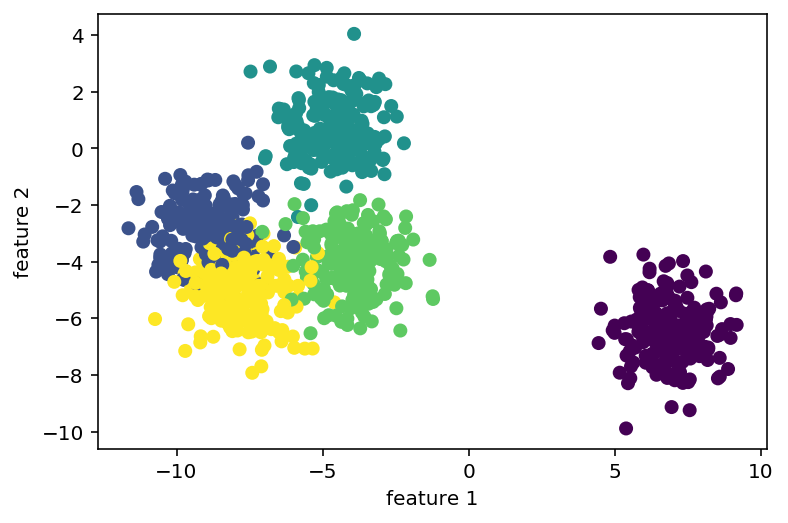

In [3]:
plt.scatter(fe_1,fe_2, 
            c=labels, cmap=plt.cm.get_cmap('viridis', 5))
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [ ]:
X.shape

### 2. Start with kernel density estimation on the data set. First, perform a grid search  5 -fold cross-validation to find the best bandwidth, testing  30  bandwidths between  0.1  and  1.0 . What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution.

In [4]:
#From Lecture Notes

# Two 2-D normal distributions with offset centroids
# See what happens when you make changes to the next 2 lines.
X = np.array([fe_1,fe_2]).T

bwrange = np.linspace(0.1, 1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
K = 5 # Do 5-fold cross validation

gscv = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K)
gscv.fit(X) #fit the model to the data

h_opt = gscv.best_params_['bandwidth']
print('Best bandwidth is : '+ str(h_opt))

Best bandwidth is : 0.4724137931034482


/Users/csuarez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


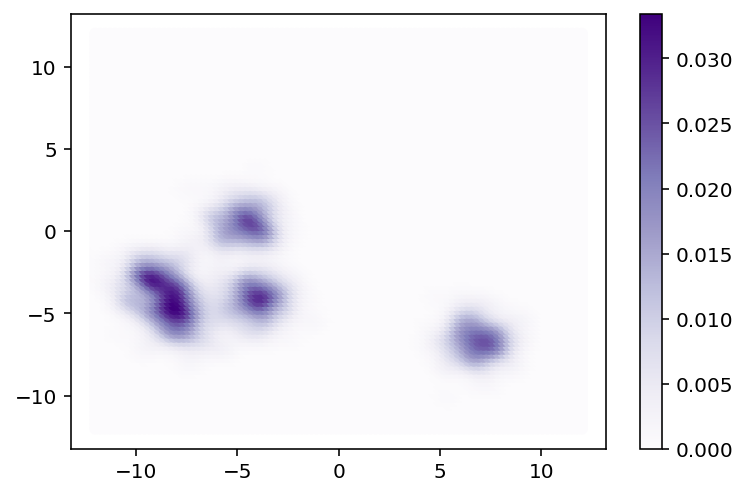

In [5]:
kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(X) #fit the model to the data

u = v = np.linspace(-12,12,100)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()

In [6]:
X.shape

(1000, 2)

In [7]:
fe_2.min()
#fe_2.max()

-9.888341222737768

In [8]:
Xgrid[:10]

array([[-12.        , -12.        ],
       [-11.75757576, -12.        ],
       [-11.51515152, -12.        ],
       [-11.27272727, -12.        ],
       [-11.03030303, -12.        ],
       [-10.78787879, -12.        ],
       [-10.54545455, -12.        ],
       [-10.3030303 , -12.        ],
       [-10.06060606, -12.        ],
       [ -9.81818182, -12.        ]])

In [9]:
#test[:10]

### 3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of  𝑘  neighbors do you need to make the plot look similar to your KDE distribution?

In [10]:
from astroML.density_estimation import KNeighborsDensity
from astropy.visualization import hist
from sklearn.neighbors import KernelDensity


# Compute density with Bayesian nearest neighbors
N = 1000 # Same as X.shape[0] or len(fe_1)
test_a = np.linspace(-12, 12, 10000)
test_b = np.linspace(-12, 12, 10000)
test = np.array([test_a, test_b]).T

k =50
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(X)
dens_nbrs = nbrs.eval(Xgrid) / N

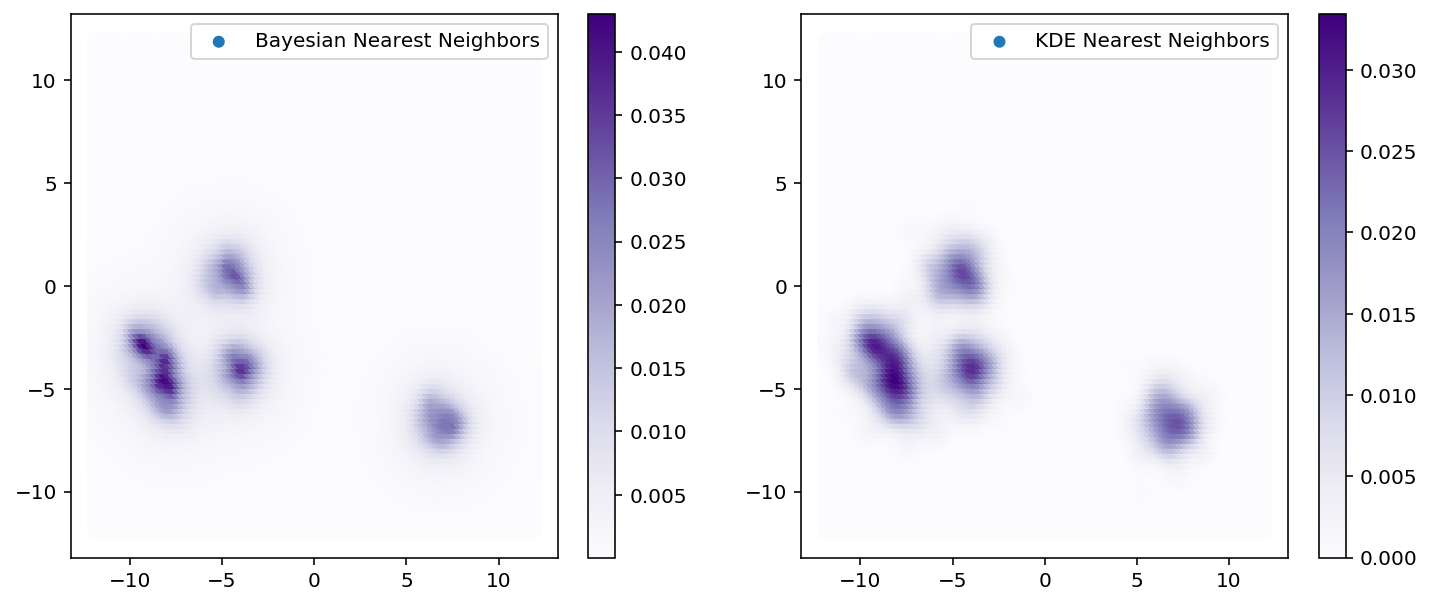

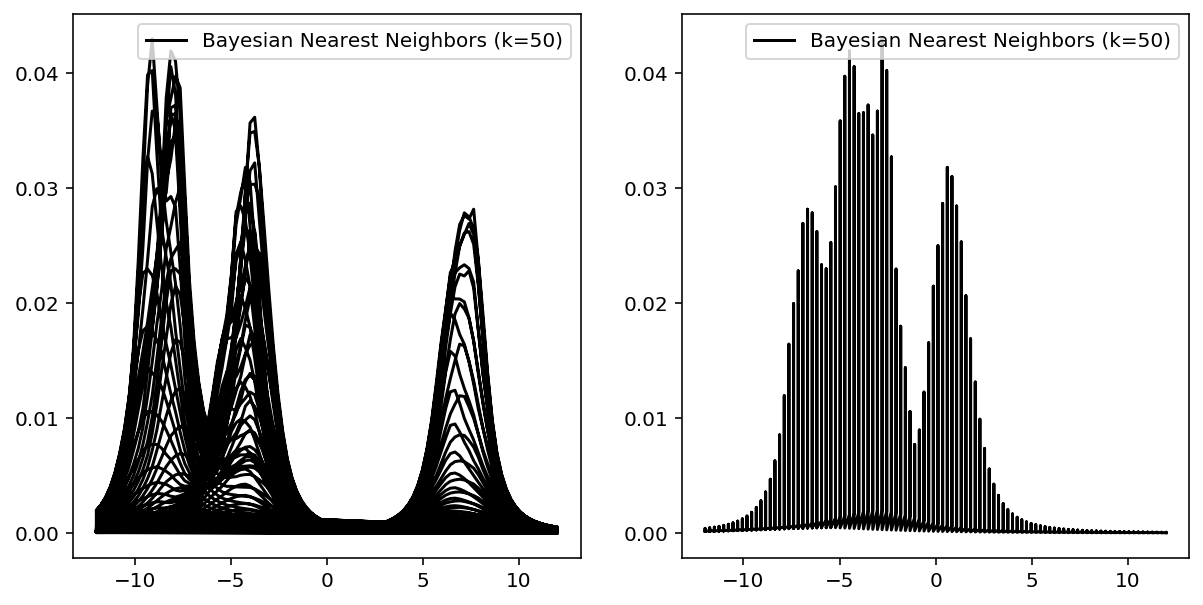

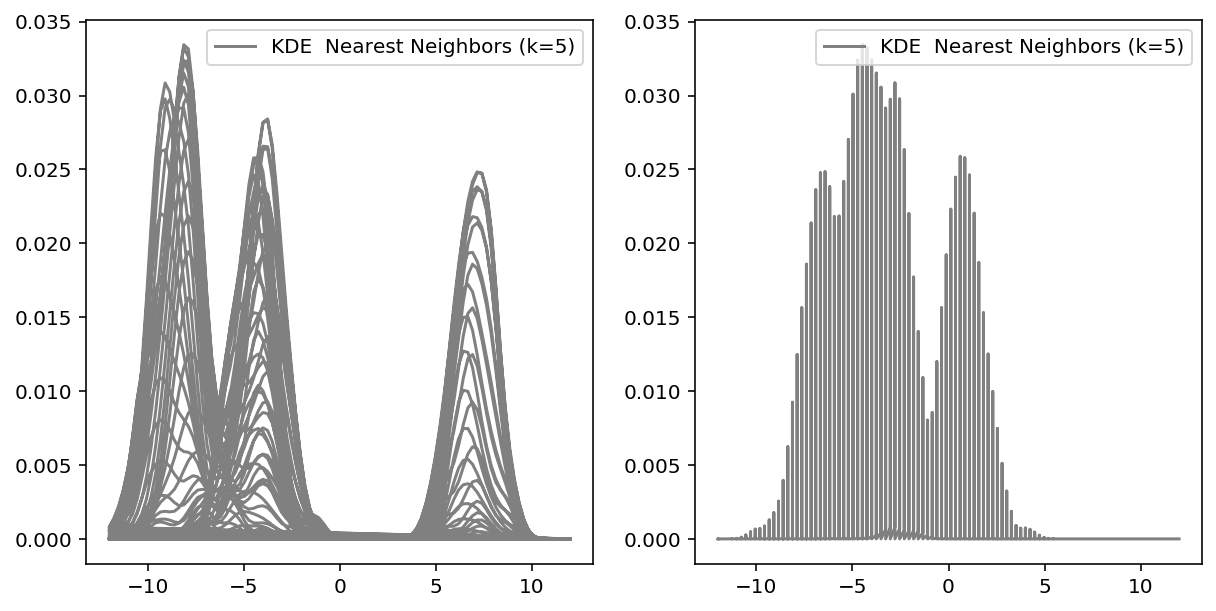

In [11]:
fig = plt.figure(figsize = (12,5))

bayes_scatter = fig.add_subplot(121)
a = bayes_scatter.scatter(Xgrid[:,0], Xgrid[:,1], c=dens_nbrs, 
            cmap="Purples", edgecolor="None", label = 'Bayesian Nearest Neighbors')
cbar = fig.colorbar(ax=bayes_scatter, mappable=a)
bayes_scatter.legend(loc = 'upper right')


kde_scatter = fig.add_subplot(122)
b = kde_scatter.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None", label = 'KDE Nearest Neighbors')
cbar = fig.colorbar(ax=kde_scatter, mappable=b)
kde_scatter.legend(loc = 'upper right')

fig = plt.figure(figsize = (10,5))

bayes_1 = fig.add_subplot(121)
bayes_1.plot(Xgrid[:,0], dens_nbrs, lw=1.5, color='black', zorder=2, 
          label="Bayesian Nearest Neighbors (k=%i)" % k)

bayes_2 = fig.add_subplot(122)
bayes_2.plot(Xgrid[:,1], dens_nbrs, lw=1.5, color='black', zorder=2, 
          label="Bayesian Nearest Neighbors (k=%i)" % k)

bayes_1.legend(loc = 'upper right')
bayes_2.legend(loc = 'upper right')


fig = plt.figure(figsize = (10,5))

kde_1 = fig.add_subplot(121)
kde_1.plot(Xgrid[:,0], dens, lw=1.5, color='gray', zorder=2, 
          label="KDE  Nearest Neighbors (k=%i)" % K)

kde_2 = fig.add_subplot(122)
kde_2.plot(Xgrid[:,1], dens, lw=1.5, color='gray', zorder=2, 
          label="KDE  Nearest Neighbors (k=%i)" % K)

kde_1.legend(loc = 'upper right')
kde_2.legend(loc = 'upper right')

In [12]:
print(test.shape)
Xgrid.shape

(10000, 2)


(10000, 2)

In [13]:
len(dens_nbrs)#.shape()

10000

In [14]:
#plt.plot(np.linspace(-12,12, len(dens.flatten())),dens.flatten())

### 4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between  1  and  10 . Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the  2 -sigma GMM component ellipses. (Use the code below to help with plotting the ellipses.)

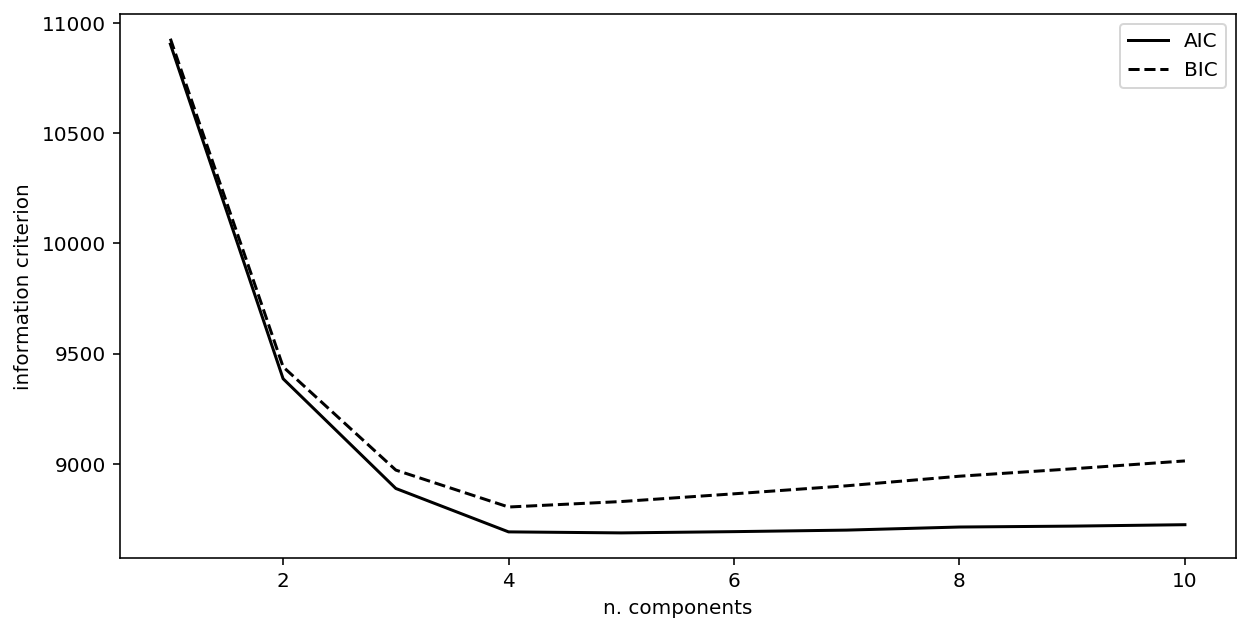

In [15]:
from sklearn.mixture import GaussianMixture

componets = np.arange(1, 11)
models = [None for i in range(len(componets))]

for i in range(len(componets)):
    models[i] = GaussianMixture(componets[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(componets, AIC, '-k', label='AIC')
ax.plot(componets, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc='upper right')



##### Accoridng to the information criterion ploted above the best number of components is 4 

In [16]:
best_comp = 4 
GMM = GaussianMixture(best_comp)
GMM.fit(X)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
GMM.means_

array([[-8.36635282, -3.92844072],
       [-4.2564725 , -1.61959664],
       [ 7.2488131 , -7.03070066],
       [ 6.6424604 , -5.85215117]])

In [18]:
GMM.covariances_

array([[[ 1.37180479, -0.69704374],
        [-0.69704374,  2.20606511]],

       [[ 1.09232794, -0.8143791 ],
        [-0.8143791 ,  6.59064005]],

       [[ 0.84529092,  0.2619764 ],
        [ 0.2619764 ,  0.72846201]],

       [[ 0.81370729,  0.03230547],
        [ 0.03230547,  0.78000382]]])

In [19]:
# Kludge to fix the bug with draw_ellipse in astroML v1.0
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, sigmas=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                             (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 
                   + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in sigmas:
        ax.add_patch(Ellipse((mu[0], mu[1]),
                             2 * scale * sigma1, 2 * scale * sigma2,
                             alpha * 180. / np.pi, lw =3,
                             **kwargs))

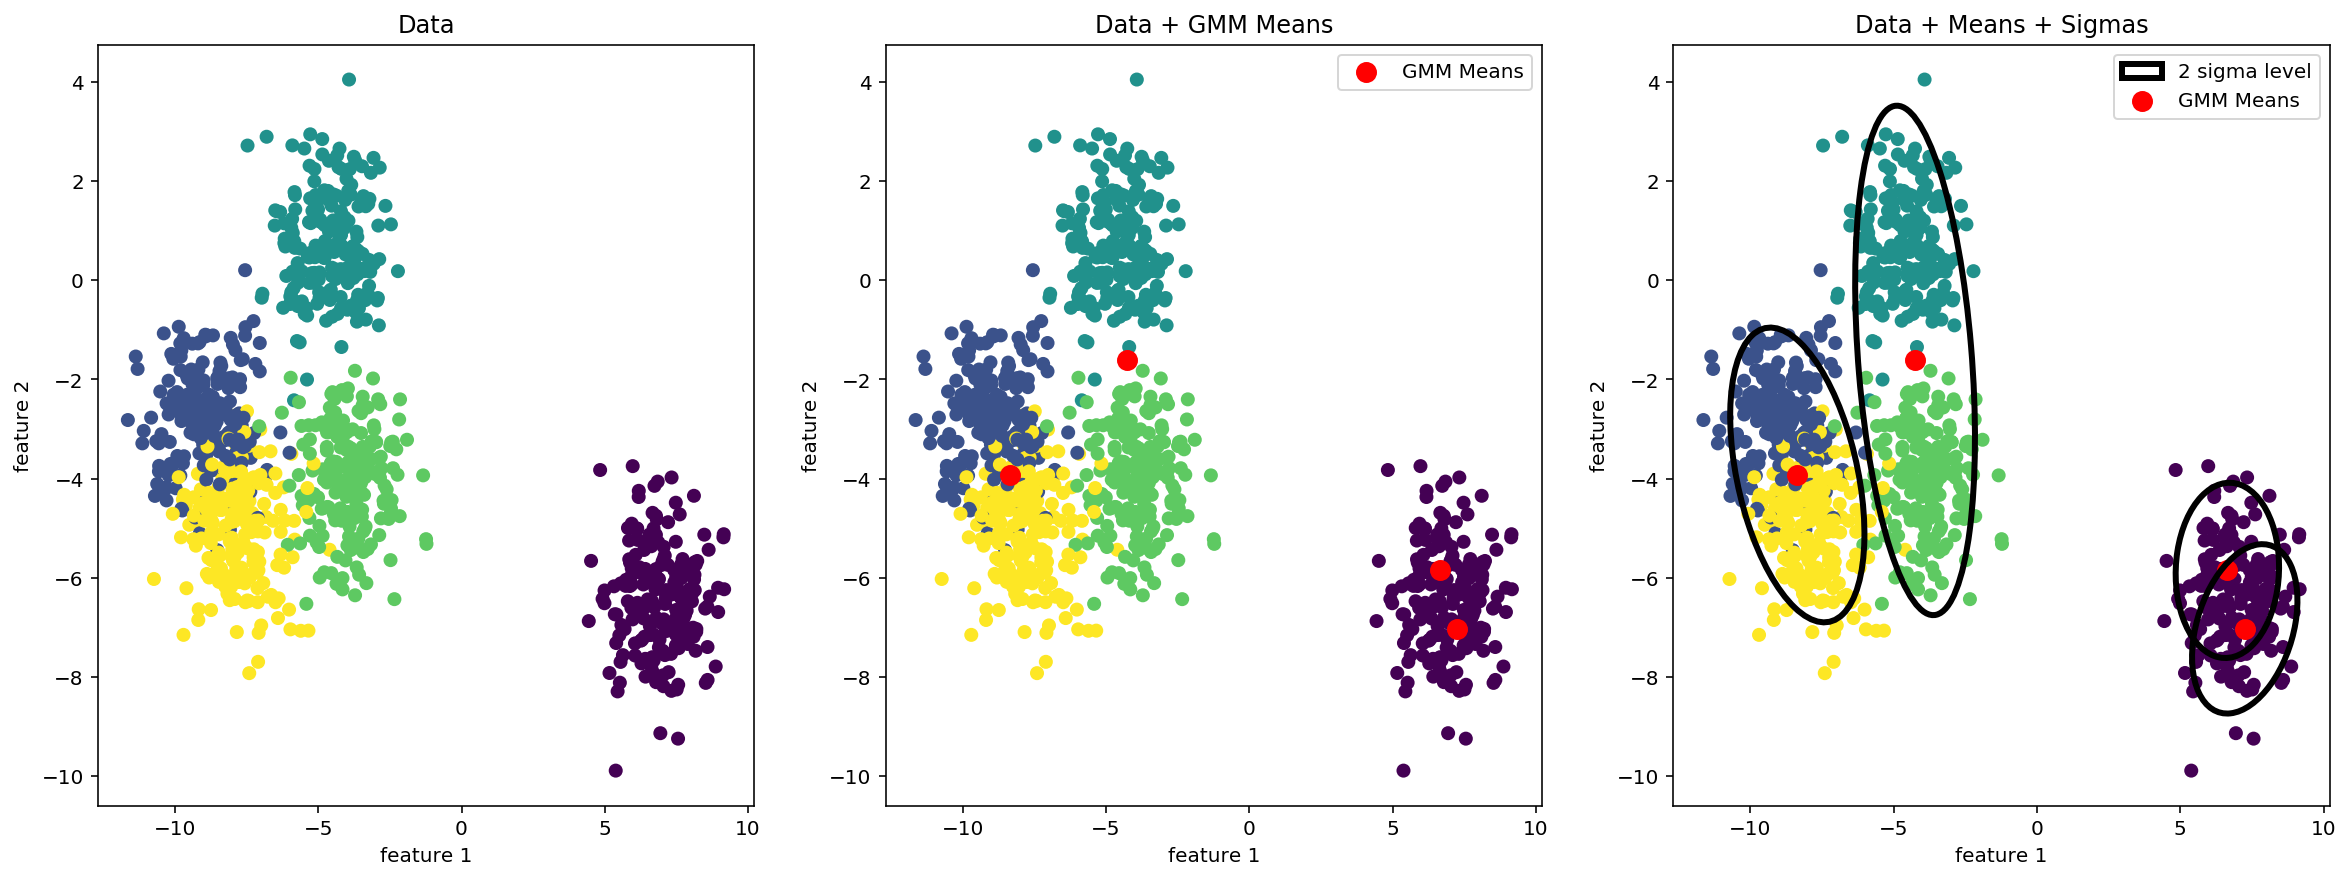

In [20]:
fig  = plt.figure(figsize = (20,7))

data = fig.add_subplot(131)
data.scatter(fe_1,fe_2, 
            c=labels, cmap=plt.cm.get_cmap('viridis', 5))
data.set_xlabel('feature 1')
data.set_ylabel('feature 2')
data.set_title('Data')

data_means = fig.add_subplot(132)
data_means.scatter(fe_1,fe_2, 
            c=labels, cmap=plt.cm.get_cmap('viridis', 5))

data_means.scatter(GMM.means_[:,0],GMM.means_[:,1], color = 'red', marker= 'o', s = 90, label = 'GMM Means')
data_means.set_xlabel('feature 1')
data_means.set_ylabel('feature 2')
data_means.set_title('Data + GMM Means')
data_means.legend(loc= 'upper right')

data_means = fig.add_subplot(133)
data_means.scatter(fe_1,fe_2, 
            c=labels, cmap=plt.cm.get_cmap('viridis', 5))

data_means.scatter(GMM.means_[:,0],GMM.means_[:,1], color = 'red', marker= 'o', s = 90, label = 'GMM Means')

draw_ellipse(GMM.means_[0], GMM.covariances_[0], sigmas=[2], fill=None)
draw_ellipse(GMM.means_[1], GMM.covariances_[1], sigmas=[2], fill=None)
draw_ellipse(GMM.means_[2], GMM.covariances_[2], sigmas=[2], fill=None)
draw_ellipse(GMM.means_[3], GMM.covariances_[3], sigmas=[2], fill=None,  label= '2 sigma level')

data_means.set_xlabel('feature 1')
data_means.set_ylabel('feature 2')
data_means.set_title('Data + Means + Sigmas')
data_means.legend(loc = 'upper right')


### 5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform these cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

In [21]:
from sklearn import preprocessing
from sklearn.cluster import KMeans


KM_cluster = 5 

scaler = preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

# Fit the K-means model
kmeans_fit = KMeans(KM_cluster)
kmeans_fit.fit(X_scaled)

# Cluster centers
centers_scaled=kmeans_fit.cluster_centers_

# Inverse transform centers to the original coordinates
centers=scaler.inverse_transform(centers_scaled)

# Predict the labels for scaled data
pred_lables=kmeans_fit.predict(X_scaled)


In [22]:
centers

array([[ 6.93608907, -6.42286837],
       [-4.57933395,  0.77799508],
       [-8.75119663, -2.68955747],
       [-7.65114598, -5.25550743],
       [-3.88884877, -3.83282471]])

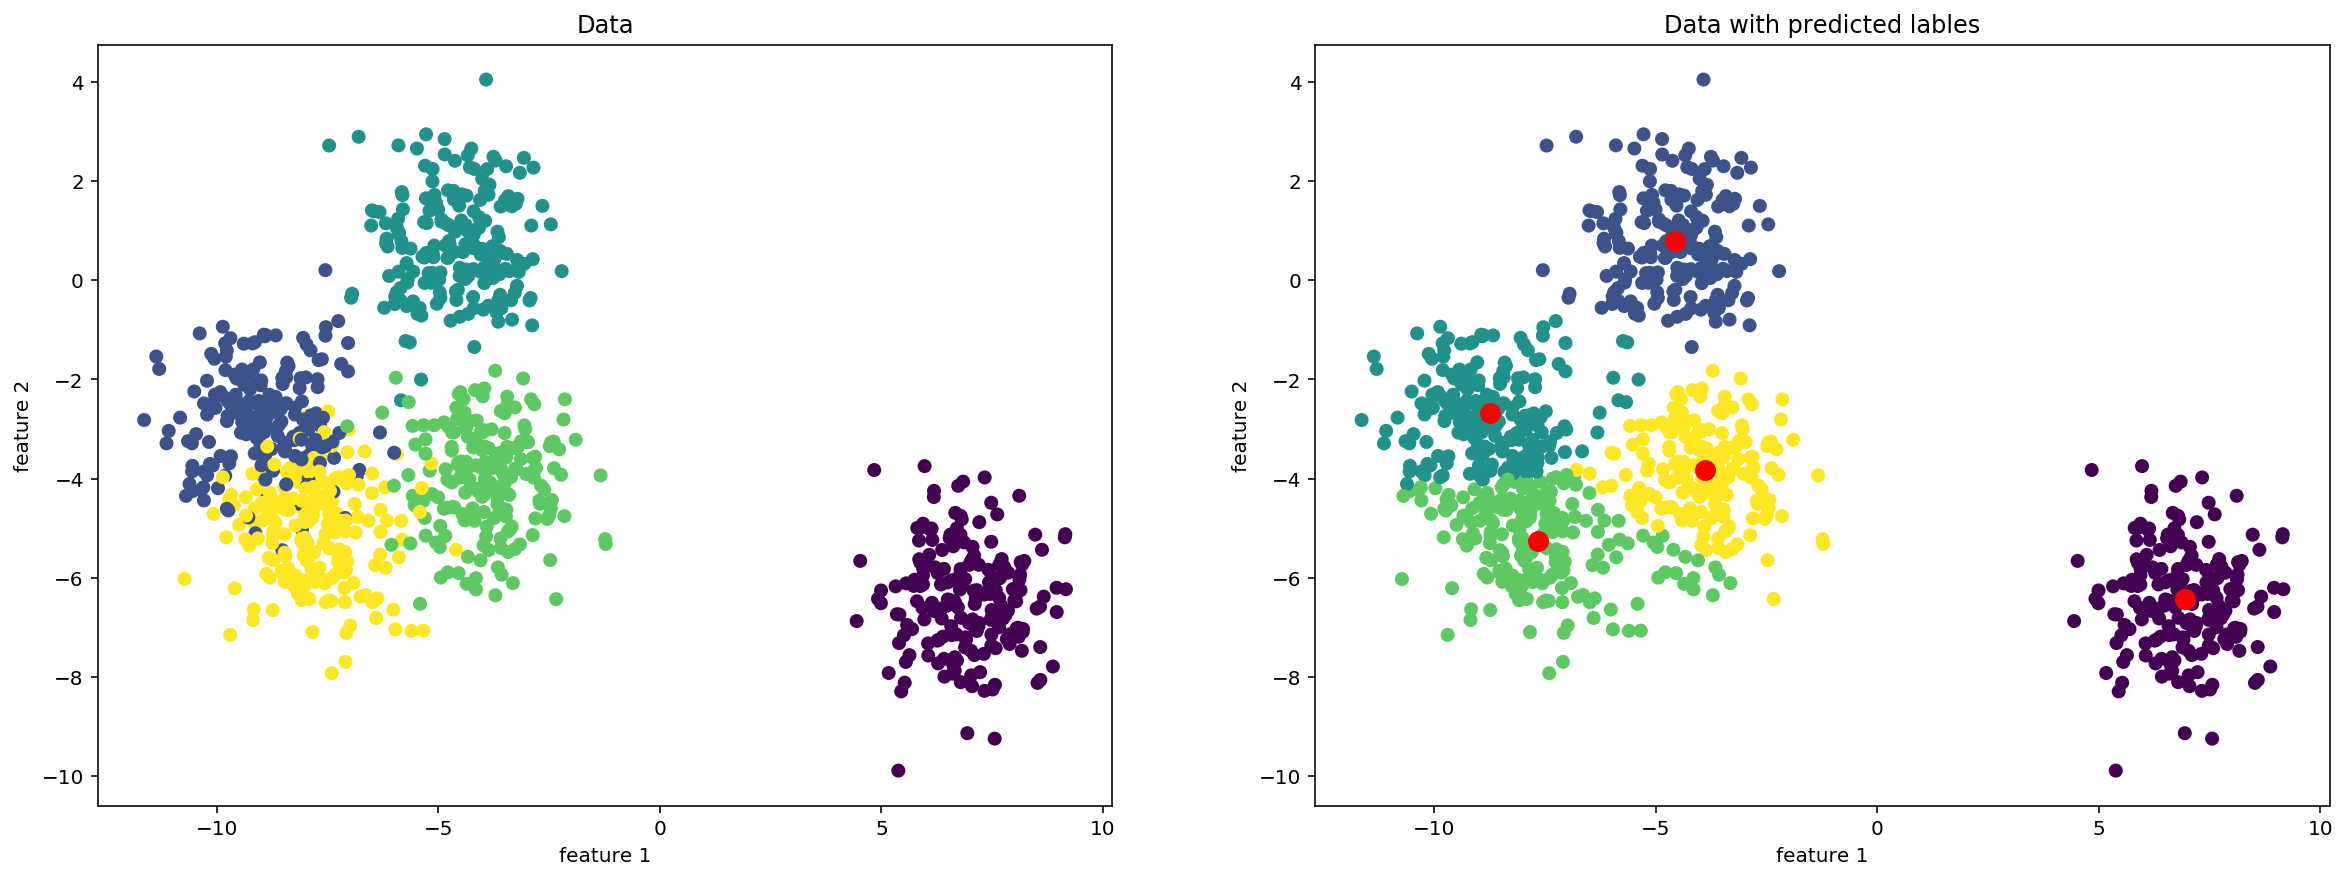

In [23]:
fig  = plt.figure(figsize = (20,7))

data = fig.add_subplot(121)
da1 = data.scatter(fe_1,fe_2, 
            c=labels, cmap=plt.cm.get_cmap('viridis', 5))


data.set_xlabel('feature 1')
data.set_ylabel('feature 2')
data.set_title('Data')



data2 = fig.add_subplot(122)
da2 = data2.scatter(fe_1,fe_2, 
            c=pred_lables, cmap=plt.cm.get_cmap('viridis', 5))
data2.set_xlabel('feature 1')
data2.set_ylabel('feature 2')
data2.set_title('Data with predicted lables')
data2.scatter(centers[:,0],centers[:,1], color = 'red', marker= 'o', s = 90, label = 'Centers')

#cbar = fig.colorbar(ax=pred_lables, mappable=da2)




---

## Problem 2

This problem has to do with dimensional reduction. We're going to load in a sample of SDSS Imaging data. 

### 1. Execute the cell below to read in the data, print out the feature names, and create a data matrix out of a subset of features.

### Solution

In [24]:
from astroML.datasets import fetch_imaging_sample
data = fetch_imaging_sample()  
data.shape  # number of objects in dataset

print(data.dtype.names)

keylist = ['ra', 'dec', 'rExtSFD', 'uRaw', 
           'gRaw', 'rRaw', 'iRaw', 'zRaw', 
           'uErr', 'gErr', 'rErr', 'iErr', 
           'zErr', 'uRawPSF', 'gRawPSF', 
           'rRawPSF', 'iRawPSF', 'zRawPSF', 
           'upsfErr', 'gpsfErr', 'rpsfErr', 
           'ipsfErr', 'zpsfErr']

X = np.column_stack([data[key] for key in keylist]) 

('ra', 'dec', 'run', 'rExtSFD', 'uRaw', 'gRaw', 'rRaw', 'iRaw', 'zRaw', 'uErr', 'gErr', 'rErr', 'iErr', 'zErr', 'uRawPSF', 'gRawPSF', 'rRawPSF', 'iRawPSF', 'zRawPSF', 'upsfErr', 'gpsfErr', 'rpsfErr', 'ipsfErr', 'zpsfErr', 'type', 'ISOLATED')


### 2. Use PCA (with randomized svd_solver for speed if necessary) to reduce the data matrix down to $2$ features. What is the explained variance of the data encapsulated in these eigen-features?

Text(0, 0.5, 'Eigenvalue 2')

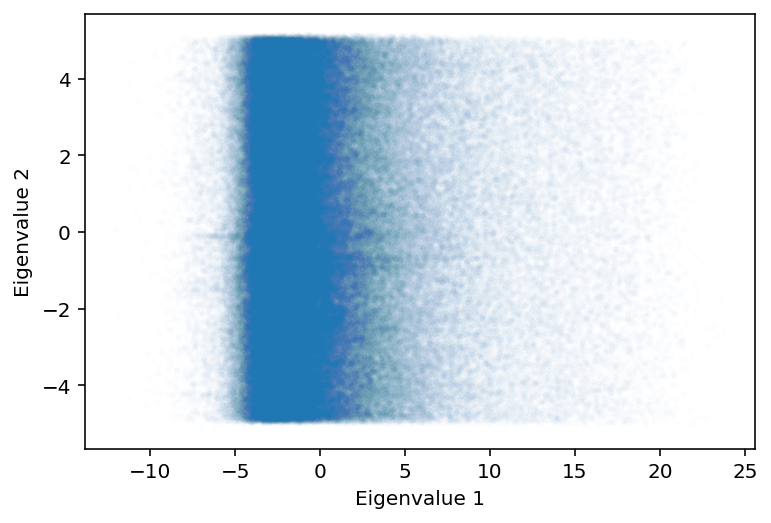

In [25]:
# Project onto 2 axes with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 components
pca.fit(X) # Do the fitting

X_reduced = pca.transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], 
            marker=".", color='C0', 
            alpha=0.01, edgecolors='None')
plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')

In [26]:
print(pca.explained_variance_ratio_[0])
print(pca.explained_variance_ratio_[1])
print(np.sum(pca.explained_variance_ratio_))

print('The ratio of the variance in the data is explained by {:.2f}'.format(np.sum(pca.explained_variance_ratio_)), ' of the data')

0.5332089685499213
0.25010565184514766
0.7833146203950689
The ratio of the variance in the data is explained by 0.78  of the data


In [27]:
data['type'] = data['type'].astype('str')

#type(data['type']).dtype

### 3. Access the `type` key of the `data` structure and make an array of labels out of these. Do some research in astroML documentation to find out what these integer types correspond to, and state that here.

In [28]:
data['type']
print(np.unique(data['type'])) # > GALAXY = 3 | STAR = 6

[3 6]


In [29]:
#Same data set where they label 3 > GALAXY and 6 > STAR
#https://www.astroml.org/examples/datasets/plot_sdss_imaging.html 

#http://skyserver.sdss.org/dr8/en/help/browser/enum.asp?n=PhotoType
#http://tdc-www.harvard.edu/catalogs/sdss.html
#"type is the morphological classification of the object"

#The data was selected from the SDSS database using the following SQL query 
#http://www.astroml.org/modules/generated/astroML.datasets.fetch_imaging_sample.html#astroML.datasets.fetch_imaging_sample



dict_labels = {0 : 'UNKNOWN', 1 : 'COSMIC_RAY', 2 : 'DEFECT',
               3 : 'GALAXY', 4 : 'GHOST', 5 : 'KNOWNOBJ',
              6 : 'STAR', 7 : 'TRAIL', 8 : 'SKY', 9 : 'NOTATYPE'}


labels = data['type']

'''
data['type'] = data['type'].astype('str')

for i in range(len(data['type'])):
    print(i)
    print( dict_labels[data['type'][i]])
    data['type'][i] = dict_labels[data['type'][i]]    

'''


"\ndata['type'] = data['type'].astype('str')\n\nfor i in range(len(data['type'])):\n    print(i)\n    print( dict_labels[data['type'][i]])\n    data['type'][i] = dict_labels[data['type'][i]]    \n\n"

The data was selected from the SDSS database using the following SQL query http://www.astroml.org/modules/generated/astroML.datasets.fetch_imaging_sample.html#astroML.datasets.fetch_imaging_sample



### 4. Choose $5000$ random integers between 0 and the number of samples in the data matrix. Record these integers because you'll use them later. Make a scatter plot of the PCA-reduced data for these $5000$ random samples, colored by their corresponding `type`. *(You may want to set the transparency to be lower than 1 to see the mixing of samples.)*

330753


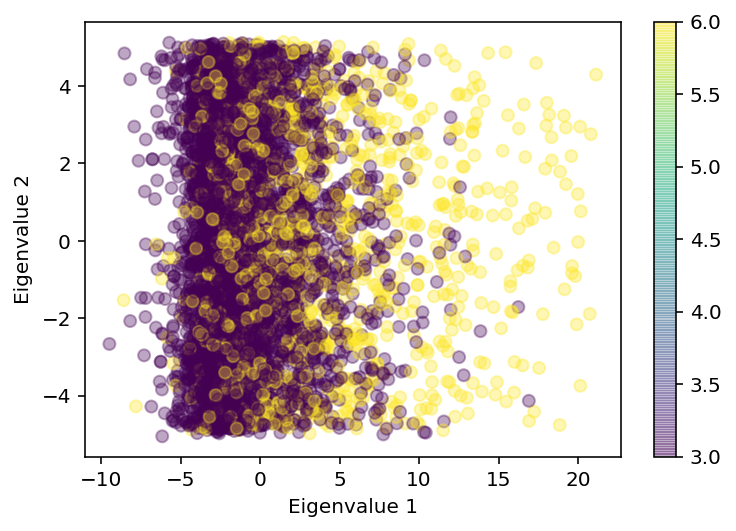

In [30]:
N=len(labels)
N_choose=5000

indx_choose= np.random.randint(0, data.shape[0], N_choose)
print(len(X))
X_reduced = pca.transform(X[indx_choose])

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=data['type'][indx_choose], alpha=0.35)
plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')

plt.colorbar()

### 5. Now try some non-linear dimensional reduction. These algorithms are slower than PCA, so you will operate only on the $5000$ random samples identified in the previous part. 
    - Try `LocallyLinearEmbedding`, `Isomap`, and `TSNE` algorithms, setting the number of components to be $2$ in all cases. 
    - As in the PCA case, make scatter plots of the dimensionally-reduced data, color coded by their `type`. For LLE and Isomap, experiment with the number of nearest neighbors between $5$ and $100$ to see what visually gives the best separation in `type` populations. For TSNE, do the same for the perplexity attribute. 
    - Which algorithm gives the cleanest way to visually see the two populations of sources? *(This will be subjective according to the samples you trained on, and even the randomness of the algorithms.)*

In [31]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [32]:
number_comp = 2 
#modles = LocallyLinearEmbedding, Isomap ,  TSNE

time_0 = time.time()

### TIME NOTE
#They all work but .... 
#the longer the list the longer the code takes to run the 3 models for the different values of nearest neighbors


#Takes ~417 seconds | ~ 7min 
num_NN = [5,10,25,50,75,100] 

#Takes ~365 seconds | ~ 6min 
#num_NN = [5,25,50,75,100]

#Takes ~345 seconds | ~ 6min 
#num_NN = [25,50,75,100]

#num_NN = [25,75,100]


LLE_list = [] 

Isomap_list = [] 

tnse_list = []

for ii in range(len(num_NN)):
    LLE = LocallyLinearEmbedding(n_neighbors=num_NN[ii], n_components=number_comp)
    LLE.fit(X[indx_choose])
    new_LLE = LLE.transform(X[indx_choose]) 
    LLE_list.append(new_LLE)

    Isomap_model = Isomap(n_neighbors=num_NN[ii], n_components=number_comp)
    Isomap_model.fit(X[indx_choose])
    new_isomap = Isomap_model.transform(X[indx_choose]) 
    Isomap_list.append(new_isomap)
    
    tsne_model = TSNE(perplexity=num_NN[ii] ,n_components=number_comp)
    tnse = tsne_model.fit_transform(X[indx_choose])
    tnse_list.append(tnse)

    
    
time_1 = time.time()

total_time = time_1-time_0
print(total_time)


389.67298102378845


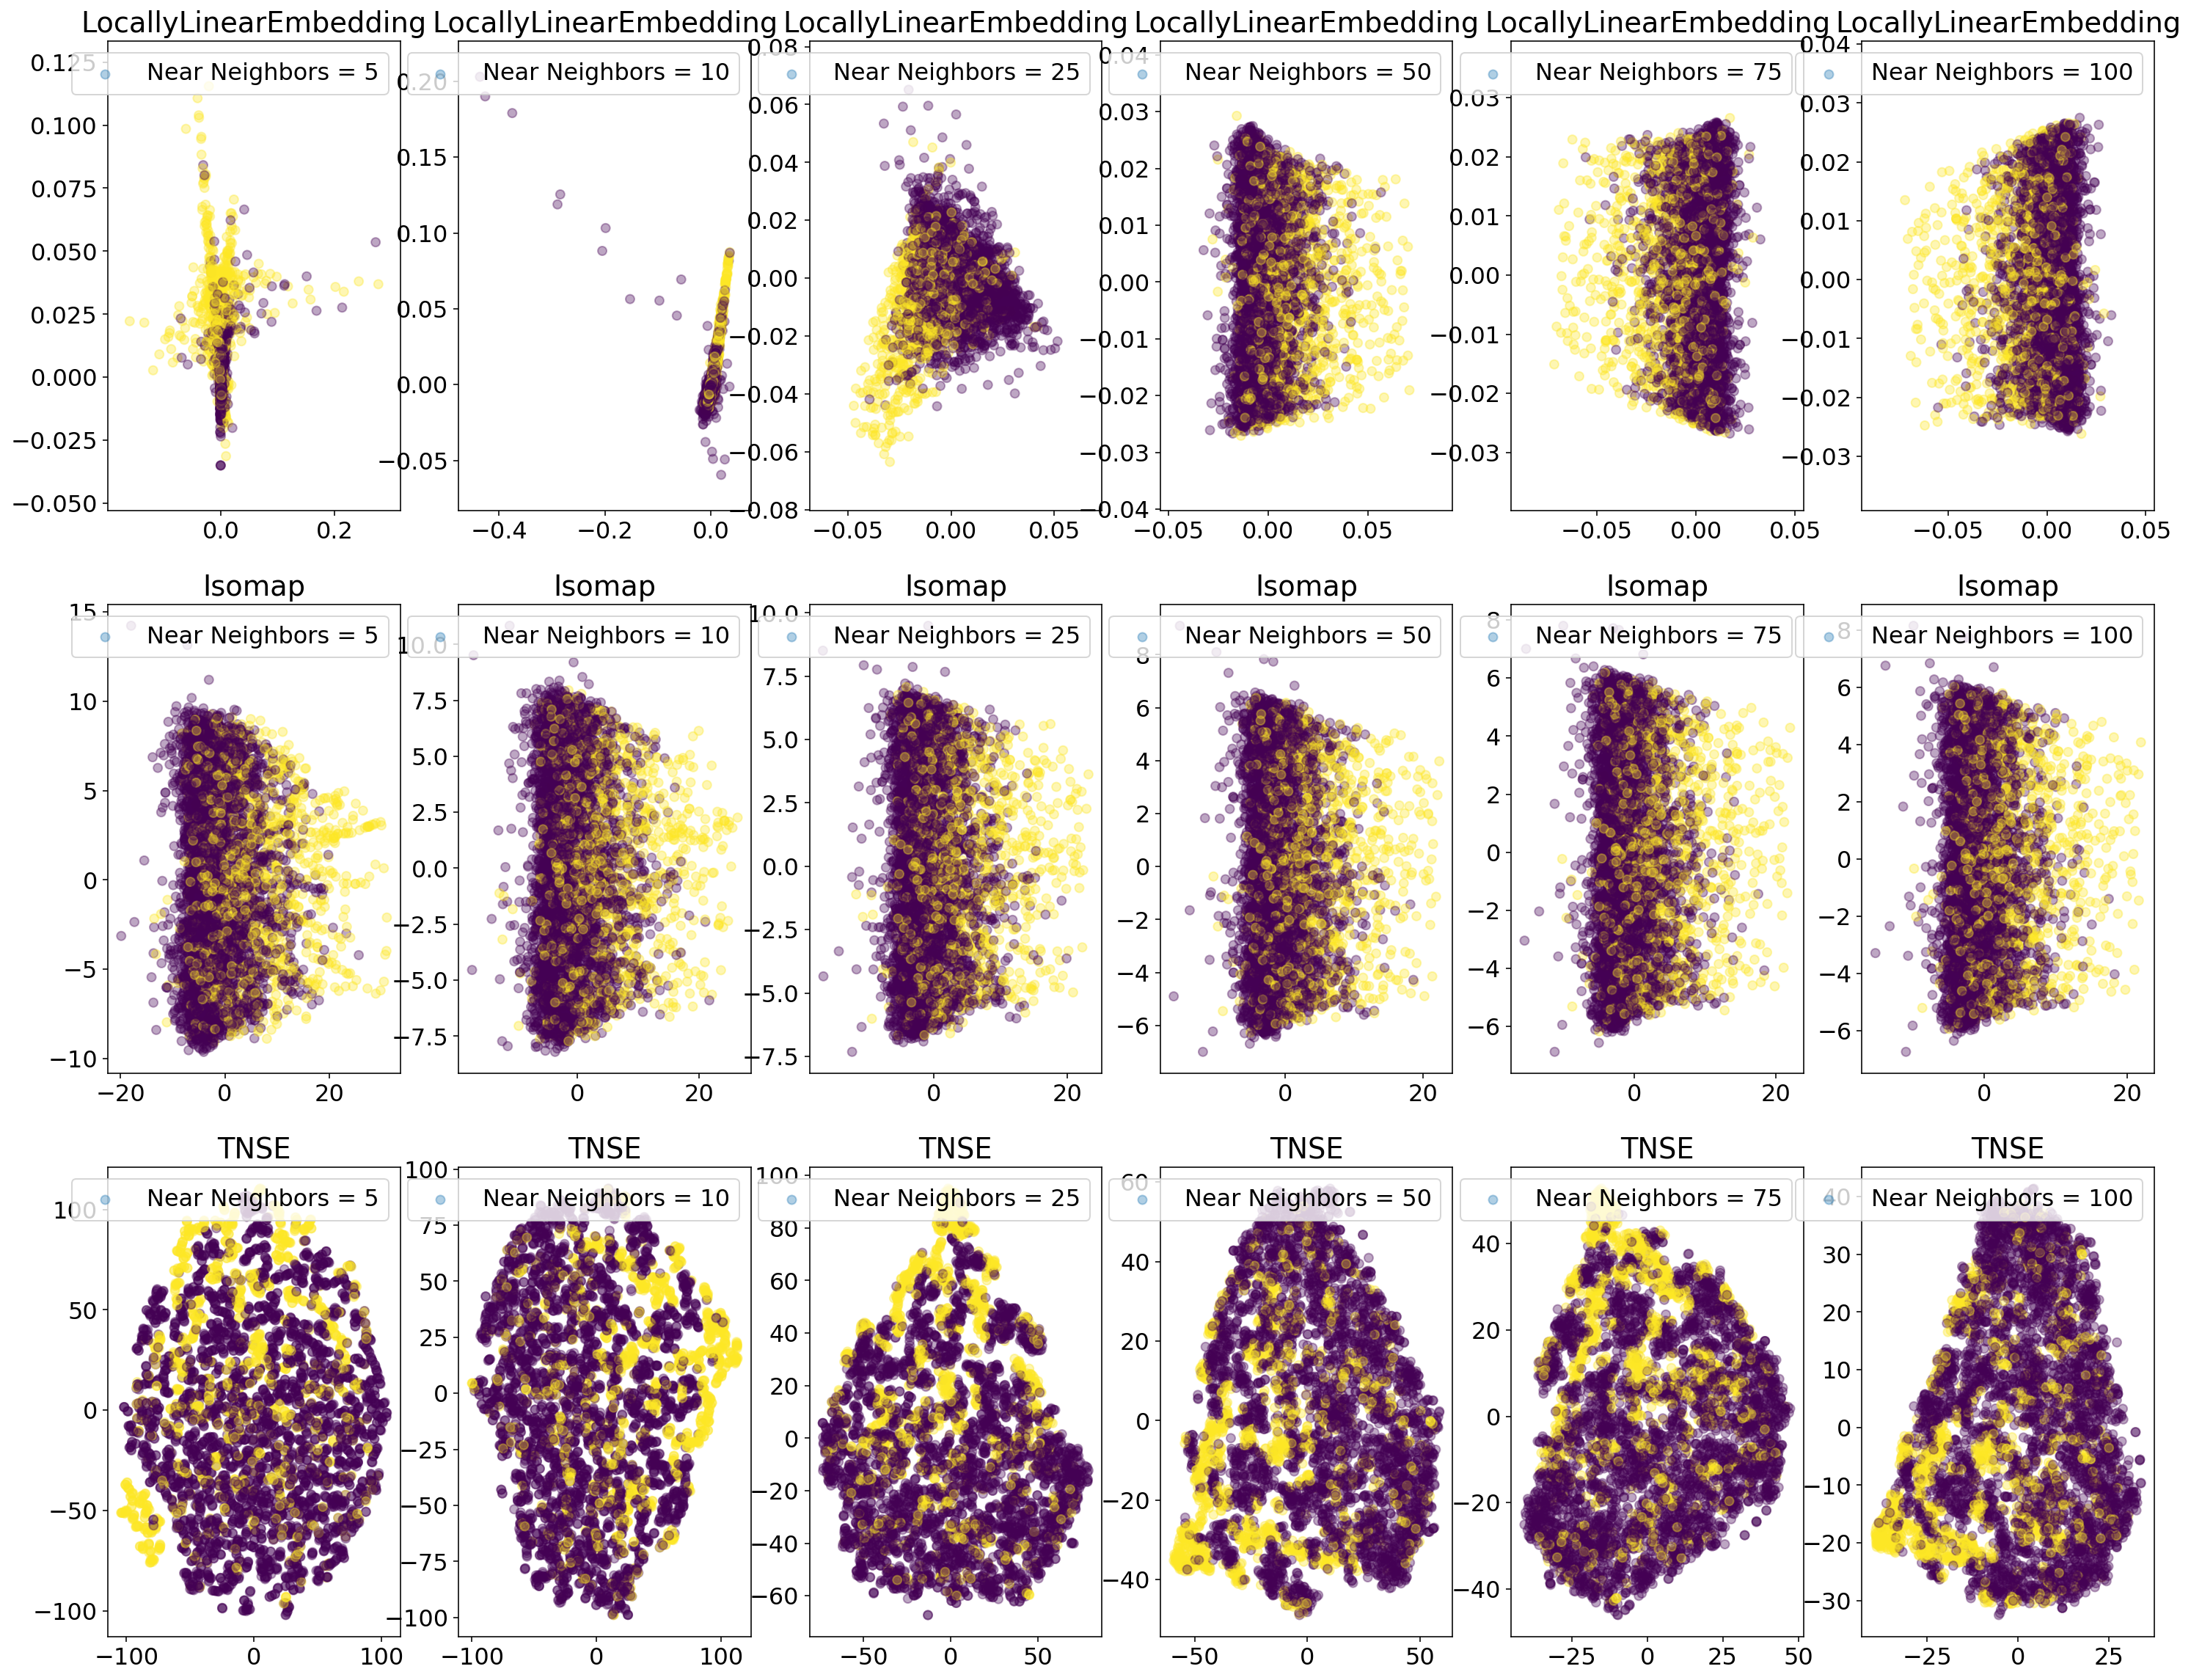

In [33]:
fig = plt.figure(figsize = (25,20))
plt.rcParams.update({'font.size': 16})

for iii in range(len(num_NN)):
    LLE_plot = fig.add_subplot(3,len(num_NN), iii+1)
    LLE_plot.scatter(LLE_list[iii][:,0],LLE_list[iii][:,1],c=data['type'][indx_choose],alpha=0.35,
                     label = 'Near Neighbors = ' + str(num_NN[iii]))
    LLE_plot.set_title('LocallyLinearEmbedding')
    LLE_plot.legend(loc = 'upper right')
    
    isomap_plot = fig.add_subplot(3,len(num_NN), len(num_NN)+iii+1)
    isomap_plot.scatter(Isomap_list[iii][:,0],Isomap_list[iii][:,1],c=data['type'][indx_choose],alpha=0.35,
                        label = 'Near Neighbors = ' + str(num_NN[iii]))
    isomap_plot.set_title('Isomap')
    isomap_plot.legend(loc = 'upper right')

    
    tnse_plot = fig.add_subplot(3,len(num_NN), len(num_NN)*2+iii+1)
    tnse_plot.scatter(tnse_list[iii][:,0],tnse_list[iii][:,1],c=data['type'][indx_choose],alpha=0.35,
                      label = 'Near Neighbors = ' + str(num_NN[iii]))
    tnse_plot.set_title('TNSE')
    tnse_plot.legend(loc = 'upper right')



### The best algorithum to visualize the two populations are Isomap and Local Linear Embedding. One advantage of Isomap to LLE is that with a low value of nearest neigbours one can visualize both populations.  With LLE, K needs to be bigger ~30 to distinguish both populations. 

## Scatch Code Belllow (Ignore)

In [34]:
300+len(num_NN)*10+iii
300+len(num_NN)*10+len(num_NN)+iii+1
plt.add_subpplot(3,len(num_NN), iii+1)
plt.add_subpplot(3,len(num_NN), len(iii)+iii+1)
plt.add_subpplot(3,len(num_NN), len(iii)*2+iii+1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_subpplot'

In [ ]:
# Isomap 

Isomap_list = [] 

for ii in range(len(num_NN)):
    Isomap_model = Isomap(n_neighbors=num_NN[ii], n_components=number_comp)
    Isomap_model.fit(X[indx_choose])
    new_isomap = Isomap_model.transform(X[indx_choose]) 
    Isomap_list.append(new_isomap)


In [ ]:
np.array(a).shape

In [ ]:
plt.scatter(a[0][:,0],a[0][:,1])
plt.scatter(a[1][:,0],a[1][:,1])

In [ ]:
a[0]

In [ ]:
len(a[0][:,0])